# Data Preprocessing

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn import set_config; set_config(display='diagram')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

## get an insight:

In [7]:
legend_list = ['Age(numerical) : age in years', 
               'Blood Pressure(numerical): bp in mm/Hg',
               'Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)',
               'Albumin(nominal): al - (0,1,2,3,4,5)',
               'Sugar(nominal): su - (0,1,2,3,4,5)',
               'Red Blood Cells(nominal): rbc - (normal,abnormal)',
               'Pus Cell (nominal): pc - (normal,abnormal)',
               'Pus Cell clumps(nominal): pcc - (present,notpresent)',
               'Bacteria(nominal): ba - (present,notpresent)',
               'Blood Glucose Random(numerical): bgr in mgs/dl',
               'Blood Urea(numerical): bu in mgs/dl',
               'Serum Creatinine(numerical): sc in mgs/dl',
               'Sodium(numerical): sod in mEq/L',
               'Potassium(numerical) pot in mEq/L',
               'Hemoglobin(numerical) hemo in gms',
               'Packed Cell Volume(numerical)',
               'White Blood Cell Count(numerical): wc in cells/cumm',
               'Red Blood Cell Count(numerical): rc in millions/cmm',
               'Hypertension(nominal) htn : (yes,no)',
               'Diabetes Mellitus(nominal): dm - (yes,no)',
               'Coronary Artery Disease(nominal): cad - (yes,no)',
               'Appetite(nominal): appet - (good,poor)',
               'Pedal Edema(nominal): pe - (yes,no)',
               'Anemia(nominal): ane - (yes,no)']

In [44]:
df=pd.read_csv('../raw_data/kidney_disease.csv')

In [10]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.shape

(400, 26)

In [12]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [14]:
## no duplicates!!

df.duplicated().value_counts()

False    400
dtype: int64

In [15]:
## defining X & y:

X = df.drop(columns = {'classification', 'id'})
y = df.classification

In [16]:
## encoding y:
y.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [17]:
#three categories in target: order the ckd/t to 1, assuming it means to be announced
y= y.replace(to_replace={'ckd':1,'notckd':0, 'ckd\t': 1}).astype(int)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: classification
Non-Null Count  Dtype
--------------  -----
400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [18]:
X.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [20]:
## get an understanding about NANs & their meaning:

X_null_legend = pd.DataFrame(X.isnull().sum())
X_null_legend['Legend'] = legend_list
X_null_legend['type'] = pd.DataFrame(X.dtypes)
X_null_legend

,0,Legend,type
age,9,Age(numerical) : age in years,float64
bp,12,Blood Pressure(numerical): bp in mm/Hg,float64
sg,47,"Specific Gravity(nominal): sg - (1.005,1.010,1...",float64
al,46,"Albumin(nominal): al - (0,1,2,3,4,5)",float64
su,49,"Sugar(nominal): su - (0,1,2,3,4,5)",float64
rbc,152,"Red Blood Cells(nominal): rbc - (normal,abnormal)",object
pc,65,"Pus Cell (nominal): pc - (normal,abnormal)",object
pcc,4,"Pus Cell clumps(nominal): pcc - (present,notpr...",object
ba,4,"Bacteria(nominal): ba - (present,notpresent)",object
bgr,44,Blood Glucose Random(numerical): bgr in mgs/dl,float64


## Numerical Feautures

In [21]:
## visualisation of numerical features:

def X_num_visualiation(X):
    X_num = X.select_dtypes(exclude = ['object'])
    for num_feature in X_num.columns:

        fig, ax = plt.subplots(1,3, figsize = (15,5))

        ax[0].set_title(f"Distribution of {num_feature}")
        sns.histplot(x = df[num_feature], kde = True, ax = ax[0])

        ax[1].set_title(f"Boxplot of {num_feature}")
        sns.boxplot(x = df[num_feature], ax = ax[1])

        ax[2].set_title(f"QQplot of {num_feature}")
        qqplot(df[num_feature], line='s', ax = ax[2])


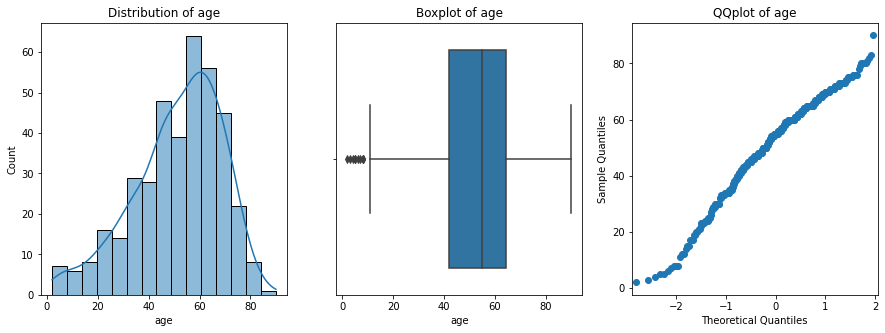

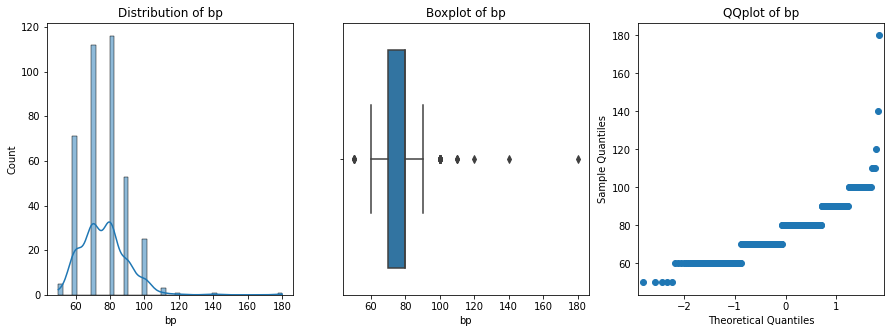

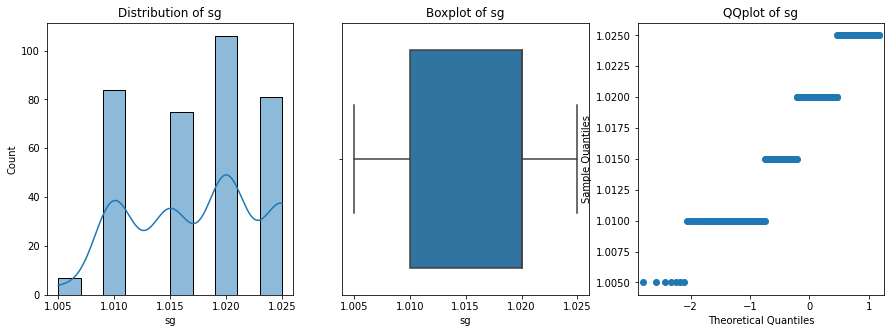

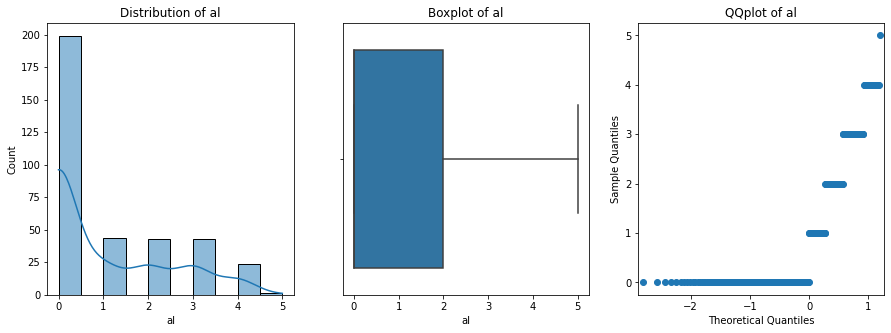

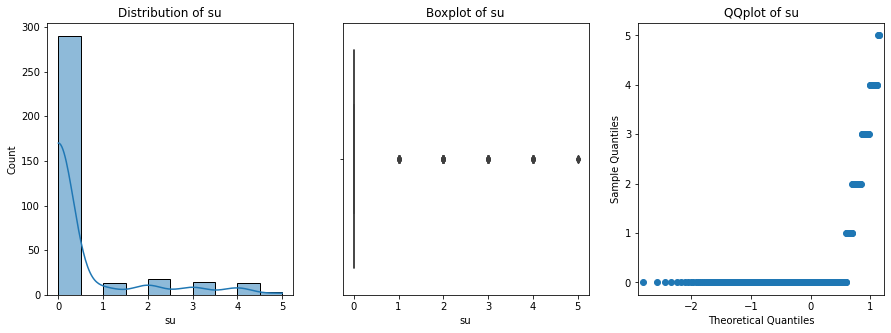

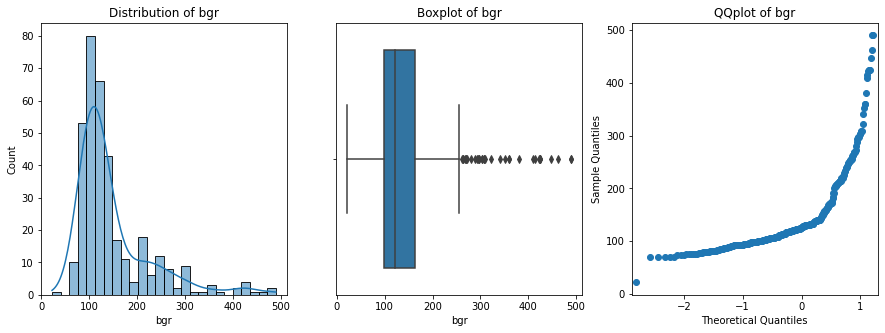

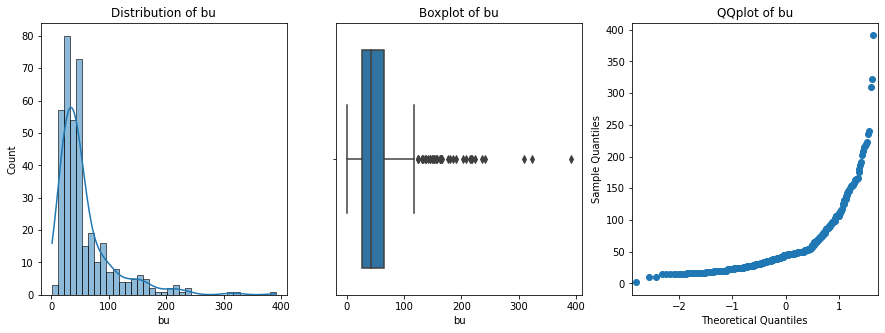

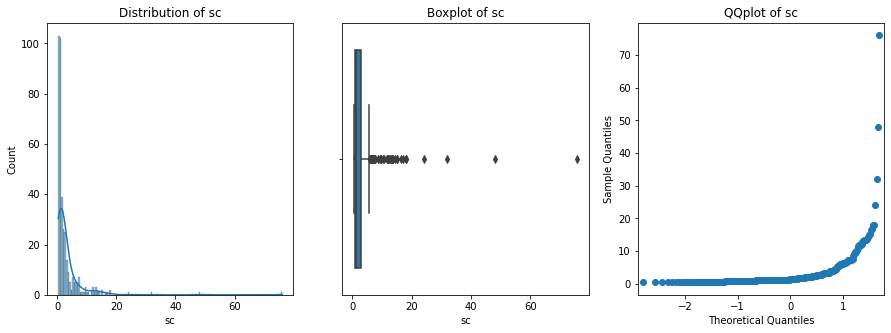

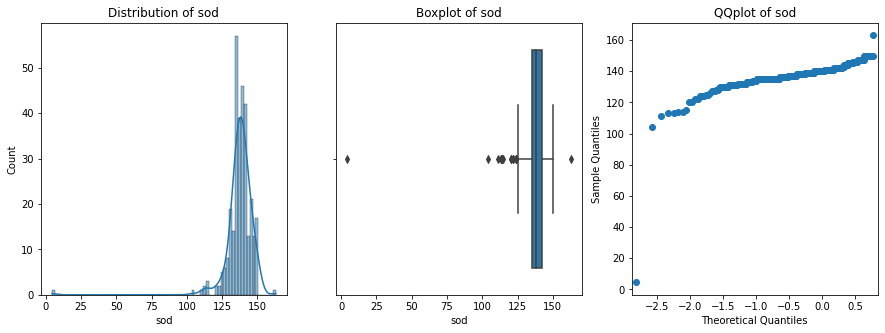

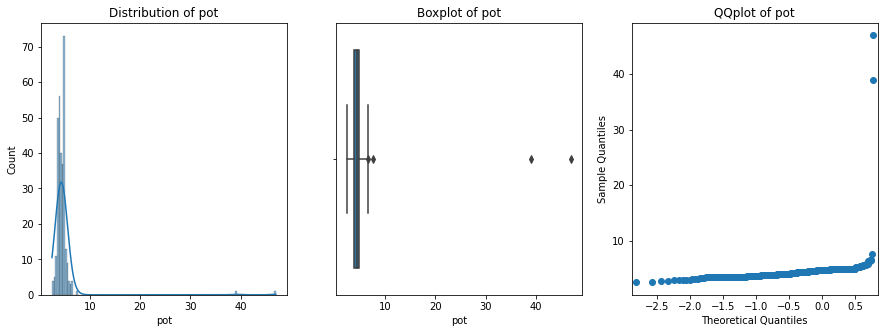

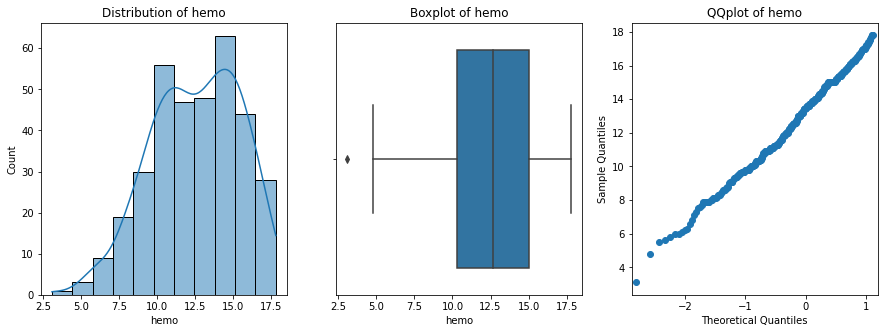

In [22]:
X_num_visualiation(X)

In [23]:
def replacing_numerical_features(X):
    '''cleaning: strips \t at beginning of number and replaces ? with nan values'''
    X['pcv'] = X['pcv'].str.lstrip('\t')
    X['pcv'] = X['pcv'].replace(to_replace='?',value=np.nan).astype(float)
    X['wc'] = X['wc'].str.lstrip('\t')
    X['wc'] = X['wc'].replace(to_replace='?',value=np.nan).astype(float)
    X['rc'] = X['rc'].str.lstrip('\t')
    X['rc'] = X['rc'].replace(to_replace='?',value=np.nan).astype(float)
    return X

replacing_numerical_features(X)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


## Categorical Features

In [51]:
def replacing_binary_features(X,y):
    '''encoding: replacing Yes --> 1 no --> 0'''
    X[['htn','dm','cad','pe','ane']] = X[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
    X[['rbc','pc']] = X[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
    X[['pcc','ba']] = X[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
    X[['appet']] = X[['appet']].replace(to_replace={'good':2,'poor':1,'no':0})
    ## replacing t_values to 0 or 1, by assuming it s close to 0 or 1, respectively
    X['cad'] = X['cad'].replace(to_replace='\tno',value=0)
    X['dm'] = X['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1})

    #encoding the target:
    y= y.replace(to_replace={'ckd':1,'notckd':0, 'ckd\t': 1}).astype(int)
    return X,y

In [52]:
replacing_binary_features(X)

TypeError: replacing_binary_features() missing 1 required positional argument: 'y'

## Going for the pipeline

In [53]:
X_null_legend

,0,Legend,type
age,9,Age(numerical) : age in years,float64
bp,12,Blood Pressure(numerical): bp in mm/Hg,float64
sg,47,"Specific Gravity(nominal): sg - (1.005,1.010,1...",float64
al,46,"Albumin(nominal): al - (0,1,2,3,4,5)",float64
su,49,"Sugar(nominal): su - (0,1,2,3,4,5)",float64
rbc,152,"Red Blood Cells(nominal): rbc - (normal,abnormal)",object
pc,65,"Pus Cell (nominal): pc - (normal,abnormal)",object
pcc,4,"Pus Cell clumps(nominal): pcc - (present,notpr...",object
ba,4,"Bacteria(nominal): ba - (present,notpresent)",object
bgr,44,Blood Glucose Random(numerical): bgr in mgs/dl,float64


In [54]:
X.nunique()

age       76
bp        10
sg         5
al         6
su         6
rbc        2
pc         2
pcc        2
ba         2
bgr      146
bu       118
sc        84
sod       34
pot       40
hemo     115
pcv       42
wc        89
rc        45
htn        2
dm         2
cad        2
appet      2
pe         2
ane        2
dtype: int64

## Grid Search and Pipeline

### get data

In [57]:
path = '../raw_data/kidney_disease.csv'

def get_cleaned_data(path='../raw_data/kidney_disease.csv'):
    '''load data from csv
    and use cleaning fct to clean them'''
    df = pd.read_csv(path)
    y = df['classification']
    X = df.drop(columns= {'classification', 'id'})

    X = replacing_numerical_features(X)
    X,y = replacing_binary_features(X,y)

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_cleaned_data()

### feature list for pipeline

In [58]:
# creating feat_lists for pipeline:
feat_binary = X.columns[X.nunique()==2]
feat_ordered = ['sg', 'al', 'su']
feat_standard_scaling = ['hemo', 'age']

#all continous values without hemo and age as they are scaled differently
feat_continuous = [i for i in list(X.columns[X.nunique()>6]) if i not in ['hemo', 'age']]

### grid search for knn

In [45]:
def knn_model(X_train,y_train):
    #X = self.scaling(X)

    knn_model = KNeighborsClassifier()
    params = {'n_neighbors': np.arange(2,11),
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], #there are more metrices
            'weights': ['uniform', 'distance']
            }


    search = GridSearchCV(knn_model, param_grid=params, scoring='recall')
    result = search.fit(X_train,y_train)
    df = pd.DataFrame(result.cv_results_)
    return [result.best_estimator_, df, result.best_params_]

### grid search for random forest

In [79]:
def forest_model(X_train,y_train):
    '''create the model, do the gridsearch
    and return fitted model with best params'''
    rfc=RandomForestClassifier()

    param_grid = {
    'n_estimators': [100, 300, 500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,5,7,10,15],
    'min_samples_split' : [2, 3, 5, 7]
    }

    cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

    search = GridSearchCV(rfc, param_grid=param_grid, scoring='recall')
    result = search.fit(X_train,y_train)

    df = pd.DataFrame(result.cv_results_)
    result.best_estimator_   

    return [result.best_estimator_, df, result.best_params_]

### grid search for logreg

In [48]:
def log_model(X_train,y_train):
    model = LogisticRegression()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # define search space
    space = dict()
    space['solver'] = ['newton-cg', 'lbfgs', 'saga', 'sag', 'liblinear']
    space['penalty'] = ['none', 'l2', 'l1', 'elastcinet']
    space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    space['max_iter'] = [50,100,200,500]

    # define search
    search = GridSearchCV(model, space, scoring='recall', n_jobs=-1, cv=cv)
    result = search.fit(X_train,y_train)

    df = pd.DataFrame(result.cv_results_)

    model = result.best_estimator_

    return [model, df, result.best_params_]

### pipeline

In [39]:
def make_pipe(X, model):
    if model != 'knn_model':
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()

    ordered_transformer = Pipeline([
                                ('cat_imputer', SimpleImputer(strategy='most_frequent')),
                                ('mm_scaler', MinMaxScaler())
                                ])

    binary_transformer = Pipeline([
                                ('cat_imputer', SimpleImputer(strategy='most_frequent'))
                                ])

    cont_transformer = Pipeline([
                                ('num_imputer', SimpleImputer()),
                                ('mm_scaler', MinMaxScaler())
                                ])
    standard_transformer = Pipeline([
                                    ('num_imputer', SimpleImputer()),
                                    ('scaler', scaler)
                                    ])

    preproc_pipe = ColumnTransformer([
                                        ('ord_trans', ordered_transformer, feat_ordered),
                                        ('bin_trans', binary_transformer, feat_binary),
                                        ('cont_trans', cont_transformer, feat_continuous),
                                        ('stand_trans', standard_transformer, feat_standard_scaling)
                                     ])

    X_proc = preproc_pipe.fit_transform(X)                                 
    return X_proc
    

   
    

In [86]:
#preprocess data in pipeline
#and make the model
X_proc = make_pipe(X, 'log_model')
model = forest_model(X_proc,y)[0]




In [87]:
y_predict = model.predict(make_pipe(X_test,'log_model'))

y_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

## evaluation

In [89]:
#accuracy_score = accuracy_score(y_test, y_predict)
#recall_score = recall_score(y_test, y_predict)
(y_test == y_predict).value_counts()

True    80
Name: classification, dtype: int64

## snippets for later: confusion matrix

In [ ]:
>>> from sklearn.metrics import confusion_matrix
>>> y_true = [2, 0, 2, 2, 0, 1]
>>> y_pred = [0, 0, 2, 2, 0, 2]
>>> confusion_matrix(y_true, y_pred)

###for binary target:
>>> y_true = [0, 0, 0, 1, 1, 1, 1, 1]
>>> y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
>>> tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
>>> tn, fp, fn, tp

###plotting
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## old code follows

In [34]:
'''imputing: using most frequent value for ordinal columns, because we have fetaures with a lot of nan values'''
ordered_transformer = Pipeline([
                            ('cat_imputer', SimpleImputer(strategy='most_frequent')),
                            ('mm_scaler', MinMaxScaler())
                            ])

binary_transformer = Pipeline([
                            ('cat_imputer', SimpleImputer(strategy='most_frequent'))
                            ])

cont_transformer = Pipeline([
                            ('num_imputer', SimpleImputer()),
                            ('mm_scaler', MinMaxScaler())
                            ])

preproc_pipe = ColumnTransformer([
                                    ('ord_trans', ordered_transformer, feat_ordered),
                                    ('bin_trans', binary_transformer, feat_binary),
                                    ('cont_trans', cont_transformer, feat_continuous)
])

In [35]:
preproc_pipe

ColumnTransformer(transformers=[('ord_trans',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('mm_scaler',
                                                  MinMaxScaler())]),
                                 ['sg', 'al', 'su']),
                                ('bin_trans',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')),
                                ('cont_trans',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('mm_scaler',
                                                  MinMaxScaler())]),
                                 ['bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'pcv',
                                  'wc', 'rc'])])

In [36]:
X_preproc = preproc_pipe.fit_transform(X)

In [ ]:
X_preproc_df = pd.DataFrame(X_preproc)
X_preproc_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.75,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.230769,0.211538,0.088575,0.010582,0.839298,0.047803,0.777778,0.231405,0.525424
1,0.75,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.269309,0.042362,0.005291,0.839298,0.047803,0.644444,0.157025,0.441938
2,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.230769,0.856838,0.132221,0.018519,0.839298,0.047803,0.488889,0.219008,0.441938
3,0.00,0.8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.511111,0.185950,0.305085
4,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.230769,0.179487,0.062901,0.013228,0.839298,0.047803,0.577778,0.210744,0.423729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.230769,0.252137,0.121951,0.001323,0.917981,0.053933,0.844444,0.185950,0.474576
396,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.153846,0.113248,0.075738,0.010582,0.861199,0.022472,1.000000,0.231405,0.694915
397,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.230769,0.166667,0.062901,0.002646,0.835962,0.042697,0.888889,0.181818,0.559322
398,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.076923,0.196581,0.124519,0.007937,0.823344,0.053933,0.933333,0.206612,0.644068


In [ ]:
X_preproc_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [ ]:
np.linalg.matrix_rank(X_preproc) == X_preproc.shape[1]

True